<a href="https://colab.research.google.com/github/mariem888/Machine-Learning-Training/blob/main/Credit_Card_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# @title Get Data Acqusition { display-mode: "both" }

Customer_Acq = pd.read_csv("/content/Customer Acqusition.csv")
Customer_Acq.head(5)



,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [5]:
# @title a. In case age is less than 18, replace it with mean of age values. { display-mode: "form" }
df = pd.DataFrame(Customer_Acq)
df.loc[df['Age']<18,'Age'] = df.Age.mean()
df

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [7]:
# @title Get Spend CSV { display-mode: "form" }
Spend_amt = pd.read_csv('spend.csv')
Spend_amt.head(5)


,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [8]:
# @title b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. { display-mode: "both" }
df1 = pd.merge(left = Customer_Acq,
               right = Spend_amt,
               left_on = 'Customer',
               right_on = 'Customer',
               how = 'inner',
               indicator = True)
Cust_limit = 0.50*df1.Limit
df1.loc[df1['Amount']>df1['Limit'],['Amount','Limit']] = Cust_limit
df1


,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,both
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,both
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,both
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,both
1496,97,A97,58.0,TRIVANDRUM,Platimum,5000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,both
1497,98,A98,51.0,CALCUTTA,Platimum,5000.5,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,both
1498,99,A99,35.0,CALCUTTA,Platimum,5001.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,both


In [9]:
# @title Get the Repayment data  { display-mode: "both" }
Repayment = pd.read_csv('Repayment.csv')
Repayment.head(5)


,SL No:,Customer,Month,Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,3-Jan-04,245899.02
2,3,A1,15-Jan-04,259490.06
3,4,A1,25-Jan-04,437555.12
4,5,A1,17-Jan-05,165972.88


In [10]:
# @title c. Incase the repayment amount is more than the limit, replace the repayment with the limit. { display-mode: "both" }
df2 = pd.merge(left = Customer_Acq,
               right = Repayment,
               left_on = 'Customer',
               right_on = 'Customer',
               how = 'inner',
               indicator = True)
df2.drop(df2.columns[11],axis=1)

df2.loc[df2['Amount']>df2['Limit'],['Amount','Limit']] = df2.Limit
df2

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,_merge
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,495414.75,both
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,245899.02,both
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,259490.06,both
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,437555.12,both
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,165972.88,both
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,100000.00,both
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,12-Jan-04,10000.00,both
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,3-Jan-04,10001.00,both
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,15-Jan-04,10002.00,both


In [11]:
# @title a. How many distinct customers exist? { display-mode: "both" }
Customer_Acq.Customer.nunique()


100

In [12]:
# @title b. How many distinct categories exist? { display-mode: "both" }
print("Product ",df1.Product.nunique())
print("Segment ",df1.Segment.nunique())
print("Type   ",df1.Type.nunique())


Product  3
Segment  5
Type    15


In [13]:
# @title c. What is the average monthly spend by customers? { display-mode: "both" }
df1['Month'] = pd.to_datetime(df1['Month'])
df1['month'] = df1['Month'].dt.month
avg_month_spend = df1.groupby(["Customer","month"])['Amount'].mean()
display(pd.DataFrame(avg_month_spend))


Amount
Customer month               
A1       1      372762.587143
         2      175235.690000
         4      261649.250000
         5      361141.310000
         8      344372.100000
...                       ...
A95      1      240401.500000
A96      1       54729.660000
A97      1        5000.000000
A98      1        5000.500000
A99      1        5001.000000

[578 rows x 1 columns]

In [14]:
# @title d. What is the average monthly repayment by customers? { display-mode: "both" }
df2['Month'] = pd.to_datetime(df2['Month'])
df2['month'] = df2['Month'].dt.month
avg_month_repay = df2.groupby(["Customer","month"])['Amount'].mean()
display(pd.DataFrame(avg_month_repay))


Amount
Customer month               
A1       1      343972.327143
         2      156374.760000
         4      254474.580000
         7      297176.740000
         9      186427.500000
...                       ...
A95      1      369405.960000
A96      1      100000.000000
A97      1       10000.000000
A98      1       10001.000000
A99      1       10002.000000

[558 rows x 1 columns]

In [15]:
# @title e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? { display-mode: "both" }
profit = df2.Amount - df1.Amount
df2['profit'] = profit
profit_mon = df2.groupby(["month"])['profit'].sum()

profit_mon


month
1     3018156.34
2     6019844.45
3     1879245.23
4     4546796.37
5     4055837.08
6      259114.30
7     2033936.92
8      696750.47
9      436487.18
10     395570.00
11     943080.18
12     916456.34
Name: profit, dtype: float64

In [16]:
# @title f. What are the top 5 product types? { display-mode: "both" }
Top_5 = Spend_amt.groupby('Type').sum().sort_values("Amount",ascending = False).head(5)
t = (Top_5).reset_index()
display(t)

<ipython-input-16-f8436c9b9d49>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_5 = Spend_amt.groupby('Type').sum().sort_values("Amount",ascending = False).head(5)


,Type,Sl No:,Amount
0,PETRO,146920,49863174.09
1,CAMERA,113612,41481571.96
2,FOOD,110164,37773338.43
3,TRAIN TICKET,90087,33067077.15
4,AIR TICKET,117877,32955445.42


In [17]:
# @title g. Which city is having maximum spend? { display-mode: "both" }
group_city = df1.groupby(['City'])['Amount'].sum()
group_city.nlargest(1)

City
COCHIN    45963513.5
Name: Amount, dtype: float64

In [18]:
# @title h. Which age group is spending more money? { display-mode: "both" }
group_age = df1.groupby('Age').sum()
amount_spend =  group_age['Amount']
amount_spend.nlargest(1)


<ipython-input-18-7bce52303769>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_age = df1.groupby('Age').sum()


Age
28.0    17365270.23
Name: Amount, dtype: float64

In [19]:
# @title i. Who are the top 10 customers in terms of repayment? { display-mode: "both" }
Top_10 = df2.groupby('Customer').sum().sort_values("Amount",ascending = False).head(10)
t = Top_10
display(t)


<ipython-input-19-17bd3a2f0228>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Top_10 = df2.groupby('Customer').sum().sort_values("Amount",ascending = False).head(10)


,No,Age,Limit,SL No:,Amount,month,profit
Customer,,,,,,,
A61,2318,1672.00,19000000.0,45502,10539142.91,159,1536816.52
A60,2280,1064.00,19000000.0,45464,9876290.74,146,-1144640.24
A13,403,899.00,15500000.0,10148,9572000.66,134,1340393.40
A43,1333,651.00,15500000.0,31424,8489871.46,117,1782083.54
A45,1395,2077.00,15500000.0,31486,8448334.87,119,1458090.77
A12,372,1581.00,15500000.0,10117,8334760.16,123,151709.52
A14,434,1441.19,15500000.0,10179,7943268.63,137,282182.43
A44,1364,868.00,15500000.0,31455,7744730.12,126,1555390.87
A39,1209,2418.00,15500000.0,31300,7622483.30,142,-128024.92


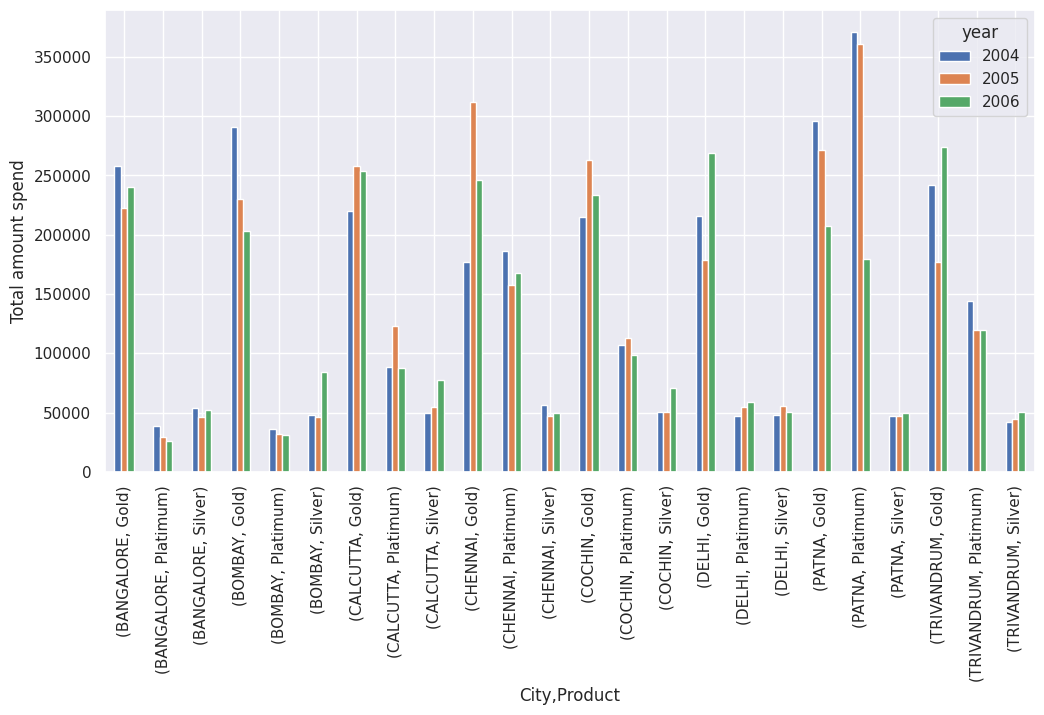

In [20]:
# @title Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same. { display-mode: "both" }
df1['Month'] = pd.to_datetime(df1['Month'])
df1['year'] = df1['Month'].dt.year
g = df1.groupby(["City","Product","year"])
tot_amount = g[["Amount"]].sum().add_prefix("Total_")
tot_amount


#Graph
sns.set()
pd.pivot_table(df1, index =['City','Product'],columns ='year',values ='Amount').plot.bar(figsize=(12,6))
plt.ylabel('Total amount spend')
plt.show()

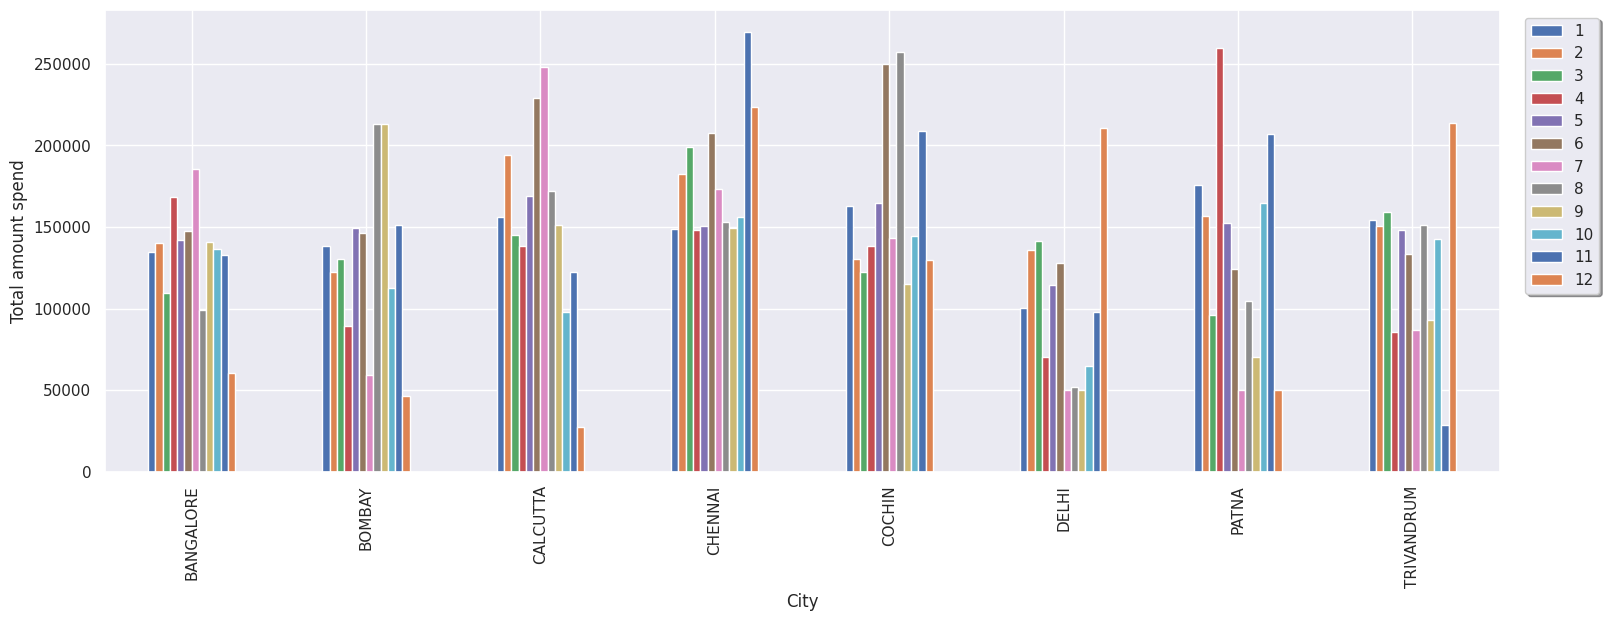

In [21]:
# @title a. Monthly comparison of total spends, city wise { display-mode: "both" }

df1['Month'] = pd.to_datetime(df1['Month'])
df1['month'] = df1['Month'].dt.month
sns.set()
pd.pivot_table(df1, index ='City',columns ='month',values="Amount").plot(kind='bar',figsize=(18,6))
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.045,1), shadow=True, ncol=1)
plt.ylabel('Total amount spend')
plt.show()

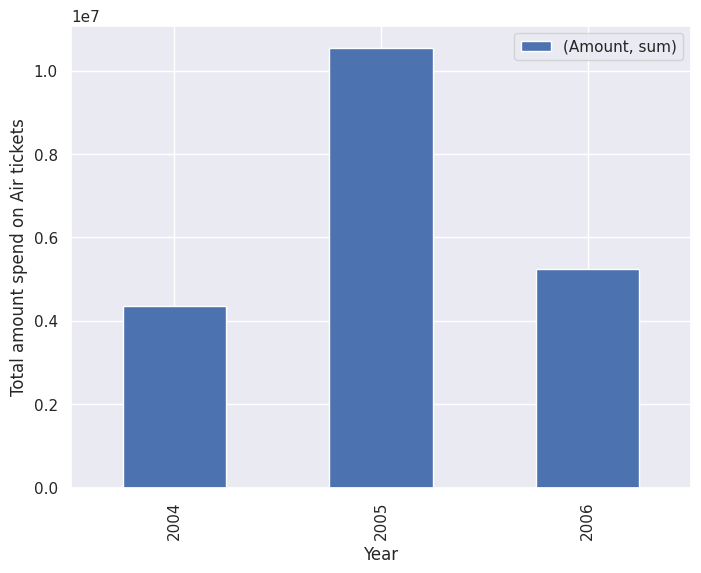

In [22]:
# @title b. Comparison of yearly spend on air tickets { display-mode: "both" }
df1['Month'] = pd.to_datetime(df1['Month'])
df1['Year'] = df1['Month'].dt.year

s = df1.loc[(df1.Type == 'AIR TICKET')]
spend = s.groupby(['Year']).aggregate({'Amount':['sum']})

spendgraph=spend.plot.bar(figsize=(8,6))
plt.legend()
plt.ylabel('Total amount spend on Air tickets')
plt.show()


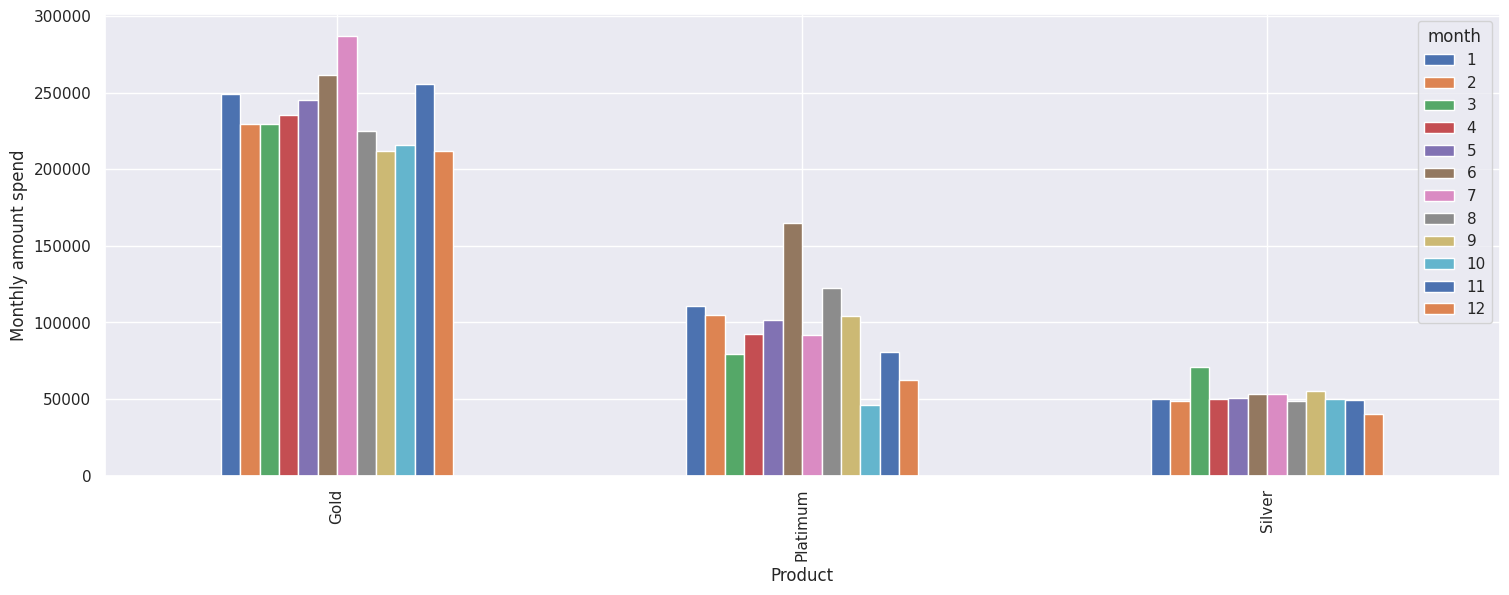

In [23]:
# @title c. Comparison of monthly spend for each product { display-mode: "both" }
df1['Month'] = pd.to_datetime(df1['Month'])
df1['month'] = df1['Month'].dt.month
g = df1.groupby(["Product","month"])
tot_amount = g[["Amount"]].sum().add_prefix("Total_")
tot_amount


#Graph
sns.set()
pd.pivot_table(df1, index ='Product',columns ='month',values ='Amount').plot.bar(figsize=(18,6))
plt.ylabel('Monthly amount spend')
plt.show()


In [26]:
# @title Find Top 10 Customers for each City, the user should will enter Product name and time period then the function will return the top 10 customers  { display-mode: "both" }
def top_customers():
    prod = input("Enter product name : ")
    time = input("Enter year  : ")
    df2['Month'] = pd.to_datetime(df2['Month'])
    df2['year'] = df2['Month'].dt.year
    df2['Month'] = df2['Month'].values.astype(str)

    data= df2[(df2['Product']==prod ) & ( df2['year']==int(time) )]
    res=data.groupby(['Customer','City']).sum().sort_values("Amount",ascending = False).head(10)
    return res

In [27]:
top_customers()

Enter product name : Gold
Enter year  : 2004


<ipython-input-26-246c1f1f2bd2>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res=data.groupby(['Customer','City']).sum().sort_values("Amount",ascending = False).head(10)


,,No,Age,Limit,SL No:,Amount,month,profit,year
Customer,City,,,,,,,,
A42,BOMBAY,504,600.00,6000000.0,12046,3045914.71,25,-16878.07,24048
A60,CALCUTTA,600,280.00,5000000.0,11445,2890721.81,16,25679.63,20040
A14,BANGALORE,126,418.41,4500000.0,3123,2770261.30,25,-32782.91,18036
A45,COCHIN,495,737.00,5500000.0,11996,2557947.39,32,-206137.63,22044
A61,COCHIN,671,484.00,5500000.0,13707,2518154.95,28,-628838.75,22044
A1,BANGALORE,7,532.00,3500000.0,459,2359797.84,8,-13785.98,14028
A12,BOMBAY,96,408.00,4000000.0,2544,2339080.90,20,-581127.87,16032
A13,BANGALORE,78,174.00,3000000.0,1998,2337012.77,15,685488.52,12024
A44,DELHI,396,252.00,4500000.0,9165,2149383.50,13,302305.25,18036
